# Heart disease Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


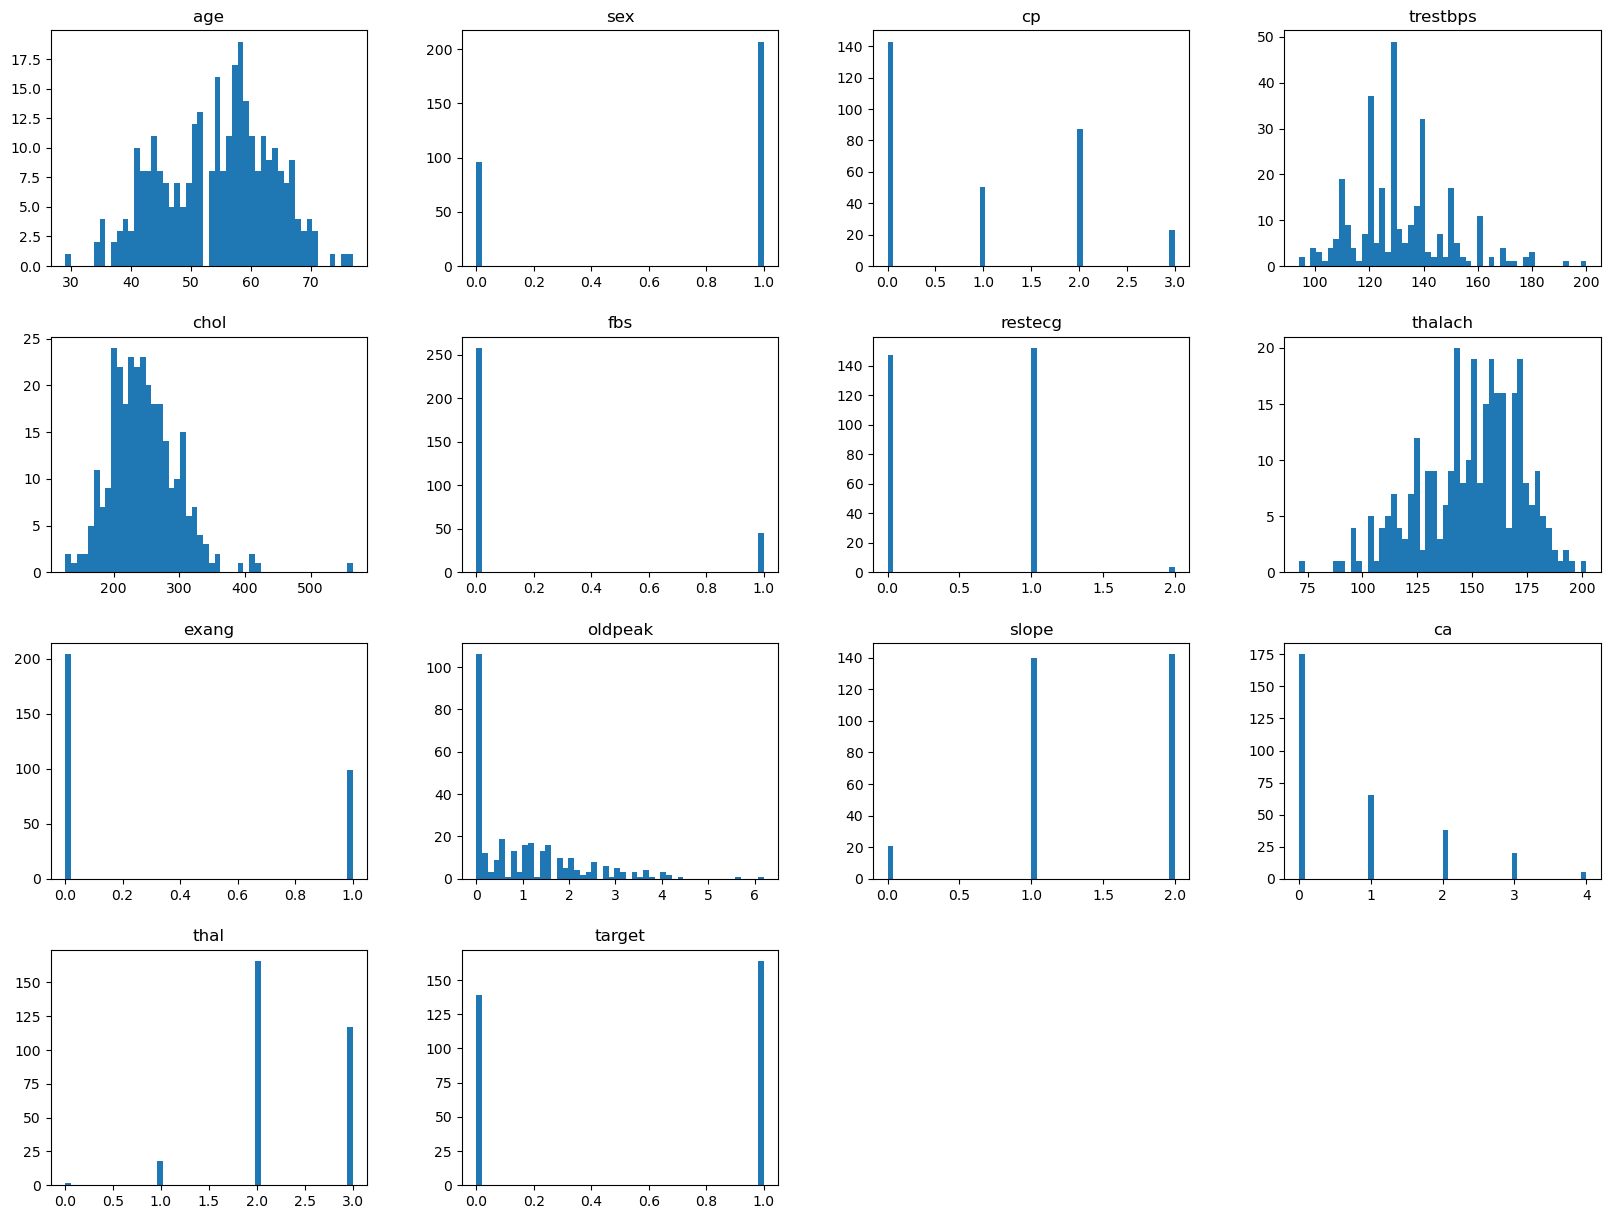

In [8]:
df.hist(bins = 50, grid=False, figsize = (20, 15));

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.541254
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Analysis

In [10]:
questions = [ "1. How many people have heart disease and how many people doesn't have heart disease?",
              "2. People of which sex has most heart disease?",
              "3. People of which sex has which type of chest pain most?",
              "4. People whith which chest pain are msot pron to have heart disease?",
              "5. Age vs Maximum heart rate when people have heart disease?",
              "6. Age vs Maximum heart rate when people doesn't have heart disease?",
              "7. Age vs serum cholestroal when people have heart disease?",
              "8. Age vs serum cholestroal when people doesn't have heart disease?",
              "9. People of which sex has more exercise include angina?",
              "10. Which sex of people has more fasting blood sugar > 120 mg/d1?",
 
    
]

In [11]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

# Finding answer of 1st questions

In [12]:
df.target.value_counts()

1    164
0    139
Name: target, dtype: int64

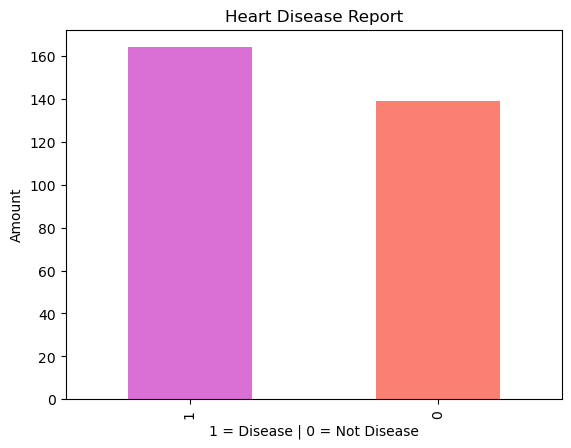

In [13]:
df.target.value_counts().plot(kind = 'bar', color = ['orchid', 'salmon'])
plt.title('Heart Disease Report')
plt.xlabel('1 = Disease | 0 = Not Disease')
plt.ylabel('Amount');


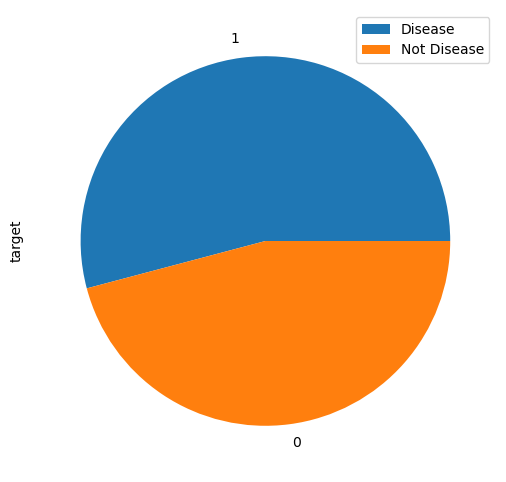

In [14]:
df.target.value_counts().plot(kind = 'pie', figsize=(8, 6))
plt.legend(["Disease", "Not Disease"])

# Finding answer of 2nd questions


In [15]:
questions


["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

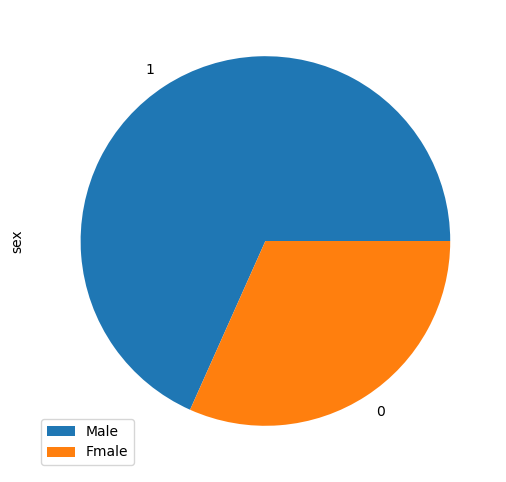

In [17]:
df.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(["Male", 'Fmale']);


In [18]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,115,92


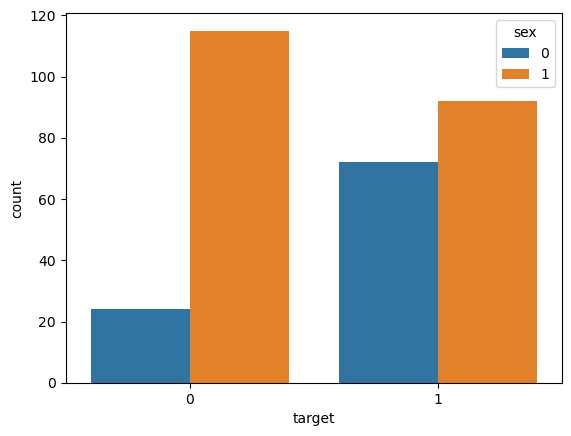

In [19]:
sns.countplot(x='target', data = df, hue = 'sex');

# Finding answer of 3rd questions


In [20]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

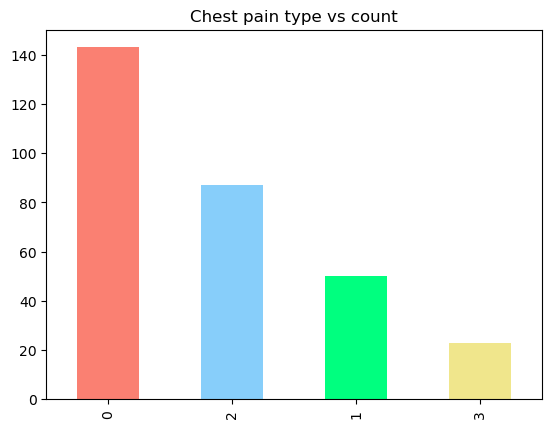

In [21]:
df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title('Chest pain type vs count');

In [22]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


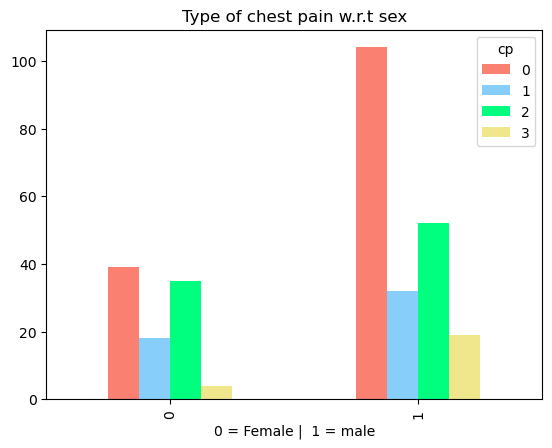

In [23]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title("Type of chest pain w.r.t sex")
plt.xlabel('0 = Female |  1 = male');


# Finding answer of 4th questions


In [24]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,8,15


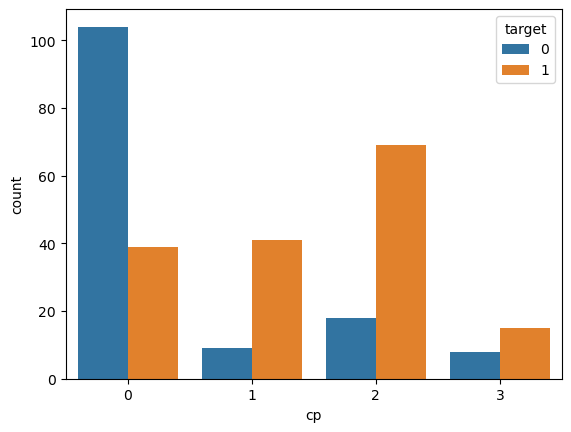

In [26]:
sns.countplot(x = 'cp', data = df, hue = 'target');

# Finding answer of 5 and 6 questions


In [27]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

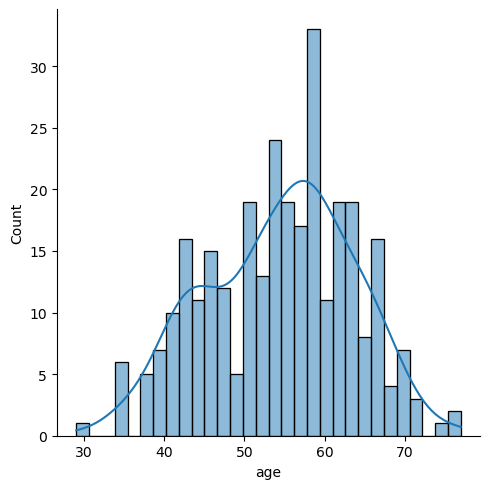

In [28]:
sns.displot(x = 'age', data = df, bins = 30, kde = True);

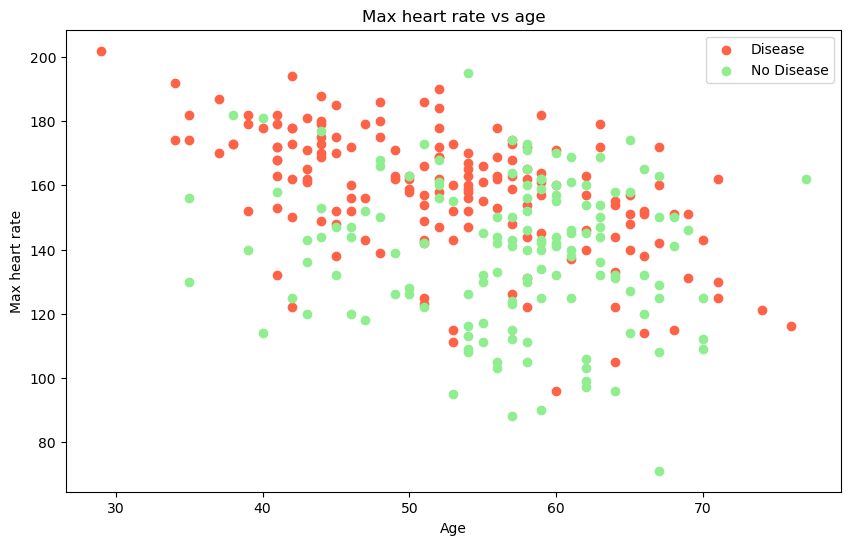

In [29]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1], 
            c = 'tomato')

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightgreen')            
    
plt.title('Max heart rate vs age')
plt.xlabel('Age')
plt.ylabel('Max heart rate');
plt.legend(['Disease', 'No Disease']);

In [30]:
df.age[df.target == 1]

1      37
2      41
3      56
4      57
5      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 164, dtype: int64

# 7 & 8

In [31]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

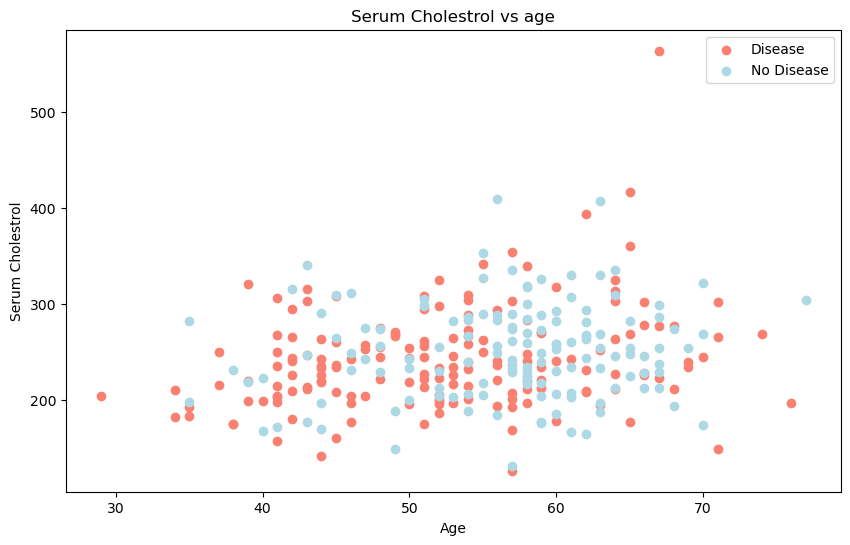

In [32]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.target == 1],
            df.chol[df.target == 1], 
            c = 'salmon')

plt.scatter(df.age[df.target == 0],
            df.chol[df.target == 0],
            c = 'lightblue')            
    
plt.title('Serum Cholestrol vs age')
plt.xlabel('Age')
plt.ylabel('Serum Cholestrol');
plt.legend(['Disease', 'No Disease']);

# Finding answer of 9th questions


In [33]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People whith which chest pain are msot pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease?',
 "6. Age vs Maximum heart rate when people doesn't have heart disease?",
 '7. Age vs serum cholestroal when people have heart disease?',
 "8. Age vs serum cholestroal when people doesn't have heart disease?",
 '9. People of which sex has more exercise include angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/d1?']

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


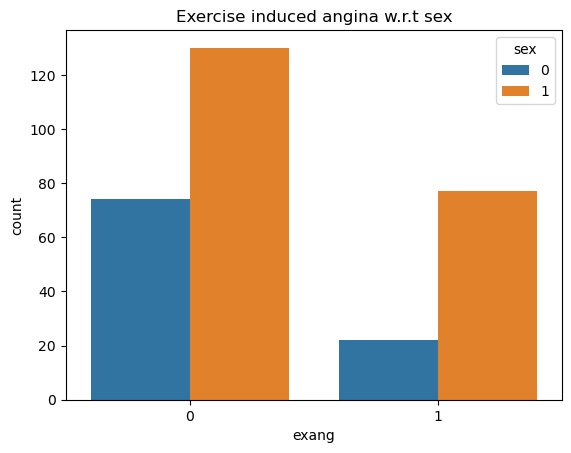

In [37]:
sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title("Exercise induced angina w.r.t sex");
